**Feature Engineering and polynomial regression:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


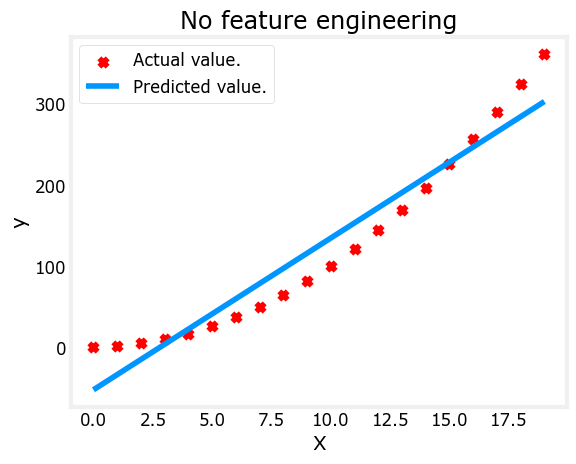

In [2]:
# Create data 
x = np.arange(20)
y = 1 + x ** 2

X = x.reshape(-1, 1)
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-2)

plt.scatter(x, y, marker='x', color = 'r', label = "Actual value.")
plt.title("No feature engineering")
plt.plot(x, X@model_w+model_b, label = "Predicted value.")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**Let's try with polynomial features:**

Iteration         0, Cost: 7.32922e+03
Iteration       100, Cost: 2.26705e-01
Iteration       200, Cost: 2.26497e-01
Iteration       300, Cost: 2.26290e-01
Iteration       400, Cost: 2.26083e-01
Iteration       500, Cost: 2.25876e-01
Iteration       600, Cost: 2.25669e-01
Iteration       700, Cost: 2.25463e-01
Iteration       800, Cost: 2.25256e-01
Iteration       900, Cost: 2.25050e-01
w,b found by gradient descent: w: [1.], b: 0.0090


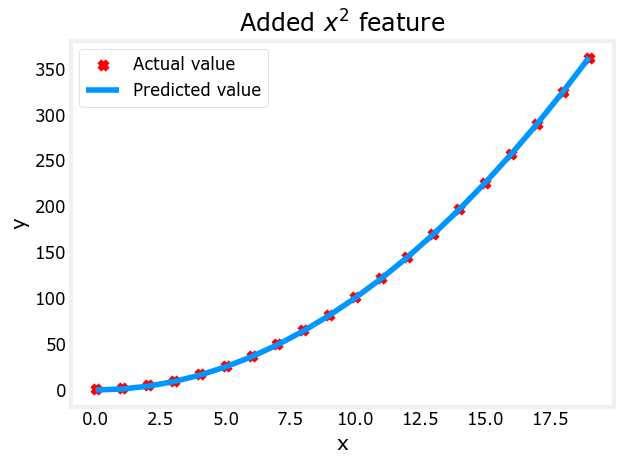

In [6]:
# Create target data
x = np.arange(0, 20, 1)
y = 1 + x ** 2 
# Engineer  features
X = x ** 2 # <-- added Engineered features 
X = X.reshape(-1, 1) 
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-5)

plt.scatter(x, y, marker='x', c = 'r', label = "Actual value")
plt.title("Added $x^2$ feature")
plt.plot(x, X@model_w+model_b, label = "Predicted value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

(20, 3)
Iteration         0, Cost: 1.14029e+03
Iteration       100, Cost: 3.78840e+02
Iteration       200, Cost: 3.72891e+02
Iteration       300, Cost: 3.67035e+02
Iteration       400, Cost: 3.61271e+02
Iteration       500, Cost: 3.55598e+02
Iteration       600, Cost: 3.50013e+02
Iteration       700, Cost: 3.44517e+02
Iteration       800, Cost: 3.39106e+02
Iteration       900, Cost: 3.33781e+02
w,b found by gradient descent: w: [0.01 0.08 0.06], b: 0.0015


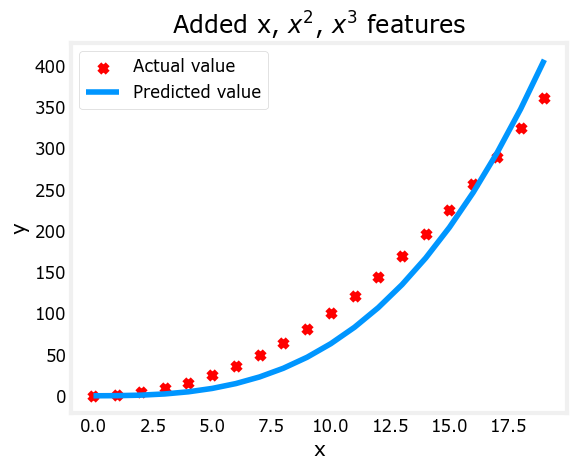

In [12]:
# Create target data 
x = np.arange(0, 20, 1)
y = x ** 2 

# Engineer features
X = np.c_[x, x**2, x**3]

print(X.shape)
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-7)
plt.scatter(x, y, marker='x', c = 'r', label = "Actual value")
plt.plot(x, X@model_w+model_b, label = "Predicted value")
plt.title("Added x, $x^2$, $x^3$ features")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

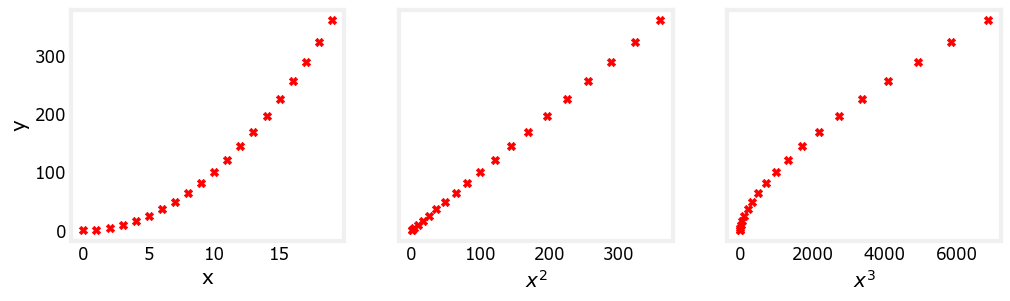

In [14]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','$x^2$','$x^3$']

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

for i in range(X.shape[1]):
    ax[i].scatter(X[:, i], y, marker='X', color='r')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

**Scaling features:**

In [15]:
x = np.arange(20)
X = np.c_[x, x**2, x**3]
print(f"Peak to peak range by column in raw         X: {np.ptp(X,axis=0)}")

X = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized  X: {np.ptp(X,axis=0)}")

Peak to peak range by column in raw         X: [  19  361 6859]
Peak to Peak range by column in Normalized  X: [3.3  3.18 3.28]


Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


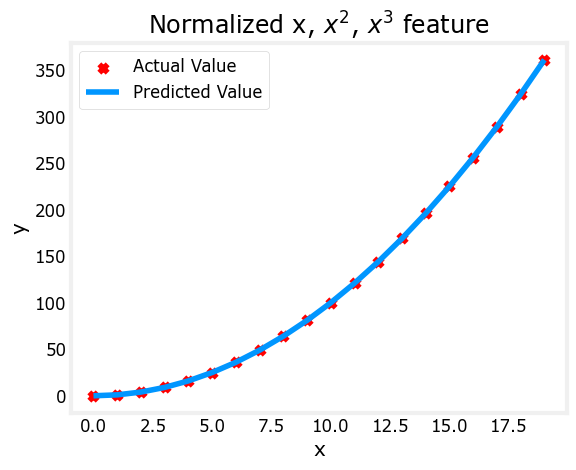

In [16]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Normalized x, $x^2$, $x^3$ feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Complex functions: `cos(x/2)`**

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.34 -10.    24.78   5.96 -12.49 -16.26  -9.51   0.59   8.7   11.94
   9.27   0.79 -12.82], b: -0.0073


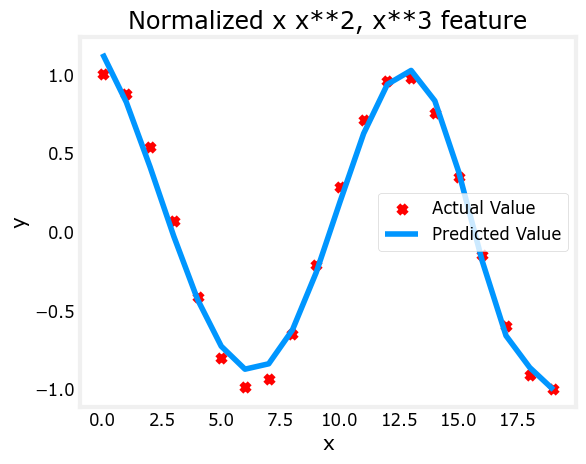

In [17]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()